In [55]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [56]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
#from sklearn.model_selection import train_test_split

In [57]:
# set image size
IMAGE_SIZE = [224, 224]

In [58]:
train_dir = 'Dataset\train'
test_dir = 'Dataset\test'

In [59]:
# adding preprocessing layer to the front of VGG
Myvgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [60]:
# do not train current weights
for layer in Myvgg.layers:
  layer.trainable = False

In [61]:
dir = glob('Dataset/train/*')
dir

['Dataset/train\\cardboard',
 'Dataset/train\\glass',
 'Dataset/train\\metal',
 'Dataset/train\\paper',
 'Dataset/train\\plastic',
 'Dataset/train\\trash']

In [62]:
Myvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [63]:
# our layers - you can add more if you want
#x = Flatten()(vgg.output)
#prediction = Dense(len(folders), activation='softmax')(x)

In [64]:
# preparing model structure

x = Flatten(name='flatten')(Myvgg.output)
#x = Dense(4096, activation='relu', name='fc1')(x)
#x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(len(dir), activation='softmax', name='predictions')(x)

In [65]:
# create a model object
model = Model(inputs=Myvgg.input, outputs=x)

In [66]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [69]:
training_set = train_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Trial 2 VGG\\Dataset\\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Trial 2 VGG\\Dataset\\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1294 images belonging to 6 classes.
Found 1233 images belonging to 6 classes.


In [70]:
# fit the model
r = model.fit(training_set, validation_data=test_set, epochs=10, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/10
41/41 [==============================] - 309s 8s/step - loss: 1.5218 - accuracy: 0.4714 - val_loss: 0.9769 - val_accuracy: 0.6204
Epoch 2/10
41/41 [==============================] - 299s 7s/step - loss: 0.7639 - accuracy: 0.7318 - val_loss: 0.8969 - val_accuracy: 0.6667
Epoch 3/10
41/41 [==============================] - 292s 7s/step - loss: 0.6653 - accuracy: 0.7612 - val_loss: 0.9671 - val_accuracy: 0.6723
Epoch 4/10
41/41 [==============================] - 986s 25s/step - loss: 0.5212 - accuracy: 0.8161 - val_loss: 0.8891 - val_accuracy: 0.6813
Epoch 5/10
41/41 [==============================] - 315s 8s/step - loss: 0.3862 - accuracy: 0.8794 - val_loss: 0.8176 - val_accuracy: 0.7088
Epoch 6/10
41/41 [==============================] - 312s 8s/step - loss: 0.3261 - accuracy: 0.8988 - val_loss: 0.8413 - val_accuracy: 0.7226
Epoch 7/10
41/41 [==============================] - 323s 8s/step - loss: 0.2906 - accuracy: 0.9119 - val_loss: 0.7830 - val_accuracy: 0.7470
Epoch 8/10
4

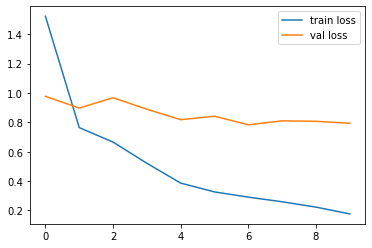

<Figure size 432x288 with 0 Axes>

In [71]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

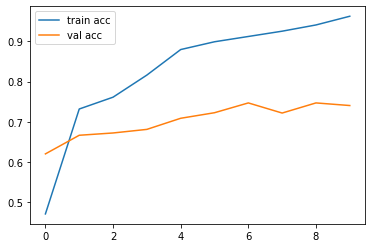

<Figure size 432x288 with 0 Axes>

In [72]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [73]:
#Save the trained model
from tensorflow.keras.models import load_model
model.save('my_vgg16.h5')

In [74]:
### Prediction

In [75]:
y_pred = model.predict(test_set)

39/39 [==============================] - 165s 4s/step


In [76]:
y_pred

array([[6.1930222e-03, 4.0643427e-01, 4.2716344e-03, 1.6686912e-01,
        3.8158280e-01, 3.4649231e-02],
       [4.3558993e-04, 4.3486300e-01, 1.9667543e-01, 2.1529959e-03,
        3.6141837e-01, 4.4545471e-03],
       [9.4282832e-06, 2.8641182e-07, 1.2012472e-05, 9.9995220e-01,
        7.5955013e-06, 1.8557876e-05],
       ...,
       [8.7973642e-01, 6.1455750e-05, 3.0316494e-04, 1.0746560e-01,
        1.3691736e-03, 1.1064092e-02],
       [1.8584438e-03, 7.2493672e-01, 2.5634587e-01, 1.0819165e-03,
        1.5772643e-02, 4.4595804e-06],
       [4.6693287e-05, 2.2020512e-03, 9.9165255e-01, 1.7283917e-03,
        2.3898858e-04, 4.1314382e-03]], dtype=float32)

In [77]:
#from keras.preprocessing.image import load_img
from keras_preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from skimage.io import imread
from pylab import *


In [78]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [79]:
y_pred

array([1, 1, 3, ..., 0, 1, 2], dtype=int64)

In [80]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [81]:
#Load the model
model=load_model('my_vgg16.h5')


In [82]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

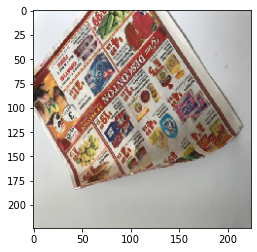

In [113]:
# Import the image for prediction
from tensorflow.keras.preprocessing import image
img=image.load_img("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Trial 2 VGG\\Dataset\\test\\paper\\paper566.jpg",target_size=(224,224))
imshow(img)

In [114]:
x=image.img_to_array(img)
x

array([[[255., 254., 251.],
        [255., 254., 251.],
        [255., 255., 253.],
        ...,
        [178., 178., 176.],
        [177., 177., 175.],
        [176., 176., 174.]],

       [[255., 254., 251.],
        [255., 254., 251.],
        [255., 255., 253.],
        ...,
        [178., 178., 176.],
        [177., 177., 175.],
        [177., 177., 175.]],

       [[255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 253.],
        ...,
        [179., 179., 177.],
        [178., 178., 176.],
        [177., 177., 175.]],

       ...,

       [[204., 205., 199.],
        [203., 204., 198.],
        [202., 203., 197.],
        ...,
        [143., 144., 139.],
        [142., 143., 138.],
        [140., 141., 136.]],

       [[204., 205., 199.],
        [203., 204., 198.],
        [202., 203., 197.],
        ...,
        [143., 144., 139.],
        [141., 142., 137.],
        [140., 141., 136.]],

       [[204., 205., 199.],
        [203., 204., 198.],
        [202., 2

In [115]:
x.shape


(224, 224, 3)

In [116]:
#x=x/255

In [117]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [118]:
img_data

array([[[[147.061   , 137.22101 , 131.32    ],
         [147.061   , 137.22101 , 131.32    ],
         [149.061   , 138.22101 , 131.32    ],
         ...,
         [ 72.061   ,  61.221   ,  54.32    ],
         [ 71.061   ,  60.221   ,  53.32    ],
         [ 70.061   ,  59.221   ,  52.32    ]],

        [[147.061   , 137.22101 , 131.32    ],
         [147.061   , 137.22101 , 131.32    ],
         [149.061   , 138.22101 , 131.32    ],
         ...,
         [ 72.061   ,  61.221   ,  54.32    ],
         [ 71.061   ,  60.221   ,  53.32    ],
         [ 71.061   ,  60.221   ,  53.32    ]],

        [[149.061   , 138.22101 , 131.32    ],
         [149.061   , 138.22101 , 131.32    ],
         [149.061   , 138.22101 , 131.32    ],
         ...,
         [ 73.061   ,  62.221   ,  55.32    ],
         [ 72.061   ,  61.221   ,  54.32    ],
         [ 71.061   ,  60.221   ,  53.32    ]],

        ...,

        [[ 95.061   ,  88.221   ,  80.32    ],
         [ 94.061   ,  87.221   ,  79.32    ]

In [119]:
#Predict the class
model.predict(img_data)


1/1 [==============================] - 0s 147ms/step


array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

In [120]:
#1: cardboard, 2:glass, 3:metal, 4:paper, 5:plastic, 6:trash.

In [121]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 132ms/step


In [122]:
a==1

array([False])